In [23]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
#import argparse
import os

In [24]:
INIT_LR = 0.01
EPOCHS = 30
BS = 32

In [25]:
# fetch dataset
DIRECTORY = r"C:\GitHub\Covid-Precaution-System\dataset"
CATEGORIES = ["with_mask", "without_mask"]

In [26]:
print("[INFO] loading images...")
data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)


[INFO] loading images...


In [27]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [28]:
# convert the data and labels to numpy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [29]:
# split 80% of the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

In [30]:
# data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [31]:
# MobileNetV2 network
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

C:\Users\ranger\AppData\Local\Temp\ipykernel_10160\3390256123.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))


In [32]:
# head of the model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [33]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [34]:
for layer in baseModel.layers:
	layer.trainable = False

In [35]:
# model compiling
print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [36]:
# training of head
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/30


c:\Users\ranger\miniconda3\envs\new3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 627ms/step - accuracy: 0.8160 - loss: 1.2237 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9688 - loss: 0.0795  
Epoch 3/30


c:\Users\ranger\miniconda3\envs\new3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 579ms/step - accuracy: 0.9884 - loss: 0.0738 - val_accuracy: 0.9844 - val_loss: 0.0664
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7.2749e-04  
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 575ms/step - accuracy: 0.9893 - loss: 0.0225 - val_accuracy: 0.9922 - val_loss: 0.0167
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.0454  
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 574ms/step - accuracy: 0.9982 - loss: 0.0132 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 8.6849e-04  
Epoch 9/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 573ms/step - accuracy: 0.9983 - loss: 0.0081 - val_accuracy: 0.9922 - val_loss: 0.0130
Epoch 10/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0221  
Epoch 11/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 20s 577ms/step - accuracy: 0.9999 - loss: 0.0034 - val_accuracy: 0.9883 - val_loss: 0.0139
Epoch 12/30


In [37]:
# evaluating
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

[INFO] evaluating network...
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 310ms/step


In [38]:
predIdxs = np.argmax(predIdxs, axis=1)

In [39]:
# classification report
print(classification_report(testY.argmax(axis=1), predIdxs,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       1.00      1.00      1.00       129
without_mask       1.00      1.00      1.00       127

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



In [40]:
print("[INFO] saving mask detector model...")
model.save("mask_detector.h5")

[INFO] saving mask detector model...


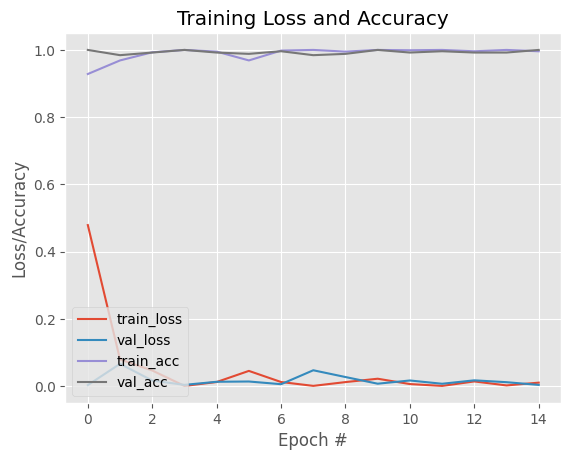

In [41]:
# plot training loss and accuracy
plot_path = "plot.png"
N = min(len(H.history["loss"]), len(H.history["val_loss"]))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"][:N], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"][:N], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"][:N], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"][:N], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(plot_path)